In [64]:
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # Use the 'Agg' backend for saving to file without displaying
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy.stats import pearsonr

#from matplotlib.dates import DateFormatter, MonthLocator



file_path = "MORTGAGE30US.csv"
file_path2 = "CORESTICKM159SFRBATL.csv"
file_path3 ="UNRATE.csv"
file_path4="TXUR.csv"
file_path5="AMERIBOR.csv"
file_cal_unem="CAUR.csv"
file_mi_un ="MIUR.csv"
file_interest="DFF.csv"
file_nj_un="NJUR.csv"

nj_un_df = pd.read_csv(file_nj_un)
interest_df = pd.read_csv(file_interest)
mi_un_df = pd.read_csv(file_mi_un)
cal_un_df = pd.read_csv(file_cal_unem)
df = pd.read_csv(file_path)
inflation = pd.read_csv(file_path2)
unemployment = pd.read_csv(file_path3)
unemployment
inflate = pd.read_csv(file_path5)
tx_unemploy = pd.read_csv(file_path4)

merged=pd.merge(unemployment,tx_unemploy,on="DATE",how="inner")
merged=pd.merge(merged,cal_un_df,on="DATE",how="inner")
merged=pd.merge(merged,mi_un_df,on="DATE",how="inner")
merged=pd.merge(merged,nj_un_df,on="DATE",how="inner")
merged=pd.merge(merged,inflation,on="DATE",how="inner")
merged=merged.rename(columns={"CORESTICKM159SFRBATL":"Nationwide Inflation Rate"})
merged=pd.merge(merged,interest_df,on="DATE",how="inner")
# merge = pd.merge(unemployment,inflation,on="DATE",how="outer")
# merge = pd.merge(merge,df,on="DATE",how="outer")

# merge = pd.merge(merge,inflate,on="DATE",how="outer")

merged

,DATE,UNRATE,TXUR,CAUR,MIUR,NJUR,Nationwide Inflation Rate,DFF
0,1980-02-01,6.3,4.9,6.3,10.4,6.6,13.627778,13.44
1,1980-03-01,6.3,5.1,6.5,11.2,6.7,14.361386,16.33
2,1980-04-01,6.9,5.3,6.7,12.0,6.9,14.786780,19.79
3,1980-05-01,7.5,5.4,6.9,12.7,7.1,15.147256,14.07
4,1980-06-01,7.6,5.4,7.1,13.2,7.3,15.810582,11.06
...,...,...,...,...,...,...,...,...
522,2023-08-01,3.8,4.1,4.6,3.7,4.2,5.217343,5.33
523,2023-09-01,3.8,4.1,4.7,3.9,4.4,5.008782,5.33
524,2023-10-01,3.8,4.1,4.8,4.1,4.6,4.931956,5.33
525,2023-11-01,3.7,4.1,4.9,4.3,4.7,4.730629,5.33


In [65]:
path_median_cpi = "MEDCPIM158SFRBCLE.csv"
median_cpi_df = pd.read_csv(path_median_cpi)
median_cpi_df= median_cpi_df.rename(columns={'MEDCPIM158SFRBCLE':"MEDIAN CPI"})
median_cpi_df

,DATE,MEDIAN CPI
0,1983-01-01,5.014653
1,1983-02-01,4.952545
2,1983-03-01,3.612261
3,1983-04-01,4.828054
4,1983-05-01,3.767326
...,...,...
487,2023-08-01,4.027318
488,2023-09-01,5.626580
489,2023-10-01,3.881948
490,2023-11-01,5.340107


In [66]:
merged = pd.merge(merged,median_cpi_df,on="DATE",how="inner")
merged = merged.rename(columns={"DFF":"Federal Funds Rate"})
merged

,DATE,UNRATE,TXUR,CAUR,MIUR,NJUR,Nationwide Inflation Rate,Federal Funds Rate,MEDIAN CPI
0,1983-01-01,10.4,8.4,11.1,16.5,9.1,4.695598,11.20,5.014653
1,1983-02-01,10.4,8.5,11.0,16.3,9.0,4.627836,8.63,4.952545
2,1983-03-01,10.3,8.5,10.8,15.9,8.9,4.855813,8.65,3.612261
3,1983-04-01,10.2,8.5,10.5,15.5,8.7,4.456934,9.12,4.828054
4,1983-05-01,10.1,8.4,10.3,15.2,8.6,3.549624,8.84,3.767326
...,...,...,...,...,...,...,...,...,...
487,2023-08-01,3.8,4.1,4.6,3.7,4.2,5.217343,5.33,4.027318
488,2023-09-01,3.8,4.1,4.7,3.9,4.4,5.008782,5.33,5.626580
489,2023-10-01,3.8,4.1,4.8,4.1,4.6,4.931956,5.33,3.881948
490,2023-11-01,3.7,4.1,4.9,4.3,4.7,4.730629,5.33,5.340107


In [67]:
filtered_df = merged[(merged['DATE'] >= '2017-01-01')]
filtered_df

,DATE,UNRATE,TXUR,CAUR,MIUR,NJUR,Nationwide Inflation Rate,Federal Funds Rate,MEDIAN CPI
408,2017-01-01,4.7,4.8,5.2,4.8,4.6,2.661562,0.55,3.436306
409,2017-02-01,4.6,4.7,5.1,4.7,4.5,2.674460,0.66,3.292346
410,2017-03-01,4.4,4.6,5.0,4.5,4.5,2.453344,0.66,1.914384
411,2017-04-01,4.4,4.5,5.0,4.3,4.4,2.252170,0.82,1.553658
412,2017-05-01,4.4,4.4,4.9,4.3,4.5,2.155911,0.91,2.113219
...,...,...,...,...,...,...,...,...,...
487,2023-08-01,3.8,4.1,4.6,3.7,4.2,5.217343,5.33,4.027318
488,2023-09-01,3.8,4.1,4.7,3.9,4.4,5.008782,5.33,5.626580
489,2023-10-01,3.8,4.1,4.8,4.1,4.6,4.931956,5.33,3.881948
490,2023-11-01,3.7,4.1,4.9,4.3,4.7,4.730629,5.33,5.340107


In [68]:
# plt.plot(filtered_df['DATE'], filtered_df['UNRATE'], label='UNRATE')
# plt.plot(filtered_df['DATE'], filtered_df['Nationwide Inflation Rate'], label='Nationwide Inflation Rate')

# plt.ylabel("%")
# plt.xlabel('DATE')
# #starting at 2017 ending 2023, need to tinker with the xlabels so you can see dates
# #plt.gca().xaxis.set_major_locator(MonthLocator(bymonth=[1, 4, 7, 10]))
# #plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))
# plt.show


# #

In [69]:
# plt.plot(filtered_df['DATE'], filtered_df['UNRATE'], label='UNRATE')
# plt.plot(filtered_df['DATE'], filtered_df['Nationwide Inflation Rate'], label='Nationwide Inflation Rate')
# # Set the x-axis range from 2017 to 2023
# plt.xlim('2017-01-01', '2023-12-31')
# plt.ylabel("%")
# plt.xlabel('DATE')
# plt.legend()
# plt.show()

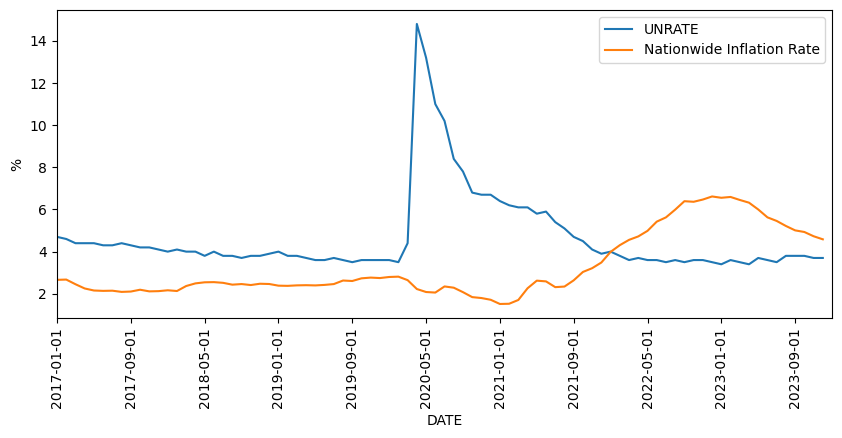

In [70]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111,  axisbelow=True)

plt.plot(filtered_df['DATE'], filtered_df['UNRATE'], label='UNRATE')
plt.plot(filtered_df['DATE'], filtered_df['Nationwide Inflation Rate'], label='Nationwide Inflation Rate')
# Set the x-axis range from 2017 to 2023
plt.xlim('2017-01-01', '2023-12-31')

#Set the x-axis to display quarterly intervals
plt.xticks(rotation="vertical")

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 8))
plt.ylabel("%")
plt.xlabel('DATE')
plt.legend()

plt.savefig("line_UNRATE_Inflation")
plt.show()


In [71]:
# Hypothosis testing for relationship between unemployment and inflation rates
# Based on the data we determined that there is an inverse relationship between unemployement rate and inflation
# More research is necessary to determine if this relationship changed directly due to COVID


In [72]:
filtered_df.head(15)

,DATE,UNRATE,TXUR,CAUR,MIUR,NJUR,Nationwide Inflation Rate,Federal Funds Rate,MEDIAN CPI
408,2017-01-01,4.7,4.8,5.2,4.8,4.6,2.661562,0.55,3.436306
409,2017-02-01,4.6,4.7,5.1,4.7,4.5,2.674460,0.66,3.292346
410,2017-03-01,4.4,4.6,5.0,4.5,4.5,2.453344,0.66,1.914384
411,2017-04-01,4.4,4.5,5.0,4.3,4.4,2.252170,0.82,1.553658
412,2017-05-01,4.4,4.4,4.9,4.3,4.5,2.155911,0.91,2.113219
413,2017-06-01,4.3,4.3,4.9,4.4,4.5,2.138530,0.91,1.896834
414,2017-07-01,4.3,4.2,4.8,4.5,4.5,2.146769,1.06,2.122094
415,2017-08-01,4.4,4.2,4.8,4.6,4.6,2.089832,1.16,2.274758
416,2017-09-01,4.3,4.1,4.7,4.7,4.6,2.106697,1.16,2.870257
417,2017-10-01,4.2,4.1,4.6,4.8,4.6,2.192819,1.06,2.424963


In [73]:
filtered_df_ura = filtered_df.iloc[:,0:6]
filtered_df_ura.head()

,DATE,UNRATE,TXUR,CAUR,MIUR,NJUR
408,2017-01-01,4.7,4.8,5.2,4.8,4.6
409,2017-02-01,4.6,4.7,5.1,4.7,4.5
410,2017-03-01,4.4,4.6,5.0,4.5,4.5
411,2017-04-01,4.4,4.5,5.0,4.3,4.4
412,2017-05-01,4.4,4.4,4.9,4.3,4.5


In [74]:
filtered_df_ura.head()

,DATE,UNRATE,TXUR,CAUR,MIUR,NJUR
408,2017-01-01,4.7,4.8,5.2,4.8,4.6
409,2017-02-01,4.6,4.7,5.1,4.7,4.5
410,2017-03-01,4.4,4.6,5.0,4.5,4.5
411,2017-04-01,4.4,4.5,5.0,4.3,4.4
412,2017-05-01,4.4,4.4,4.9,4.3,4.5


In [75]:
inflation_filtered = filtered_df.iloc[:,6:9]
inflation_filtered.head()

,Nationwide Inflation Rate,Federal Funds Rate,MEDIAN CPI
408,2.661562,0.55,3.436306
409,2.674460,0.66,3.292346
410,2.453344,0.66,1.914384
411,2.252170,0.82,1.553658
412,2.155911,0.91,2.113219


In [76]:
inflation_only = inflation_filtered[["Nationwide Inflation Rate", "MEDIAN CPI"]]
inflation_only

,Nationwide Inflation Rate,MEDIAN CPI
408,2.661562,3.436306
409,2.674460,3.292346
410,2.453344,1.914384
411,2.252170,1.553658
412,2.155911,2.113219
...,...,...
487,5.217343,4.027318
488,5.008782,5.626580
489,4.931956,3.881948
490,4.730629,5.340107


In [77]:
### Insert line graph for 





In [78]:
#Anova Testing
group0 = filtered_df_ura["UNRATE"].values
group1 = filtered_df_ura["TXUR"].values
group2 = filtered_df_ura["CAUR"].values
group3 = filtered_df_ura["MIUR"].values
group4 = filtered_df_ura["NJUR"].values


In [79]:
stats.f_oneway(group0, group1, group2, group3, group4)

F_onewayResult(statistic=2.2450721839233028, pvalue=0.06349637096787919)

In [80]:
# Analysis/Comparison. If total US numbers included are we skuing the numbers
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=1.850092288215673, pvalue=0.13788327737629757)

In [81]:
# data = [group0, group1, group2, group3, group4]
# plt.boxplot(data)
# plt.show()

Ho = There is no significant differnce in the unemployment rates between 2017 to 2023 in states in different regions 
Ha = There is a significant different in the unemployment rates

p-value < alpha (0.05)
pvalue = 0.06349637096787919

We would fail to reject the null hypothosis; there is no significant difference in the unemployment rates in states
in different regions


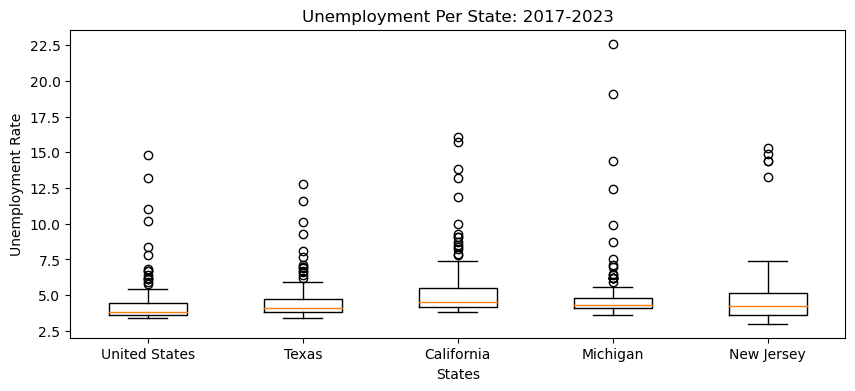

In [82]:
#Set list to hold groups
data = [group0, group1, group2, group3, group4]
# Labels for each group
group_labels = ['United States', 'Texas', 'California', 'Michigan', 'New Jersey']
# Plot the boxplot with labels
# changed the figure to 10,4 to elongate it for display in the power point
plt.figure(figsize=(10,4))
plt.boxplot(data, labels=group_labels)
plt.title('Unemployment Per State: 2017-2023')
plt.xlabel('States')
plt.ylabel('Unemployment Rate')

plt.savefig("boxplot_wFliers")
plt.show()



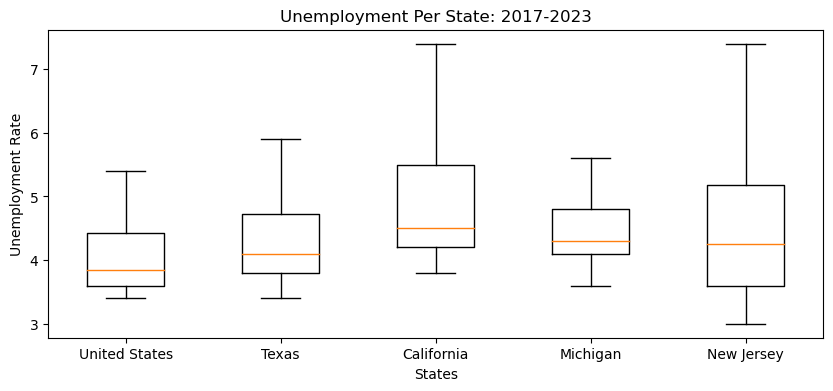

In [83]:
#next step would be drop outliers

#Set list to hold groups
data = [group0, group1, group2, group3, group4]
# Labels for each group
group_labels = ['United States', 'Texas', 'California', 'Michigan', 'New Jersey']
# Plot the boxplot with labels
# changed the figure to 10,4 to elongate it for display in the power point
plt.figure(figsize=(10,4))
plt.boxplot(data, labels=group_labels, showfliers=False)
plt.title('Unemployment Per State: 2017-2023')
plt.xlabel('States')
plt.ylabel('Unemployment Rate')

plt.savefig("US-StateUnemp17-23")
plt.show()

#####This is the box plot for Unemployment graph


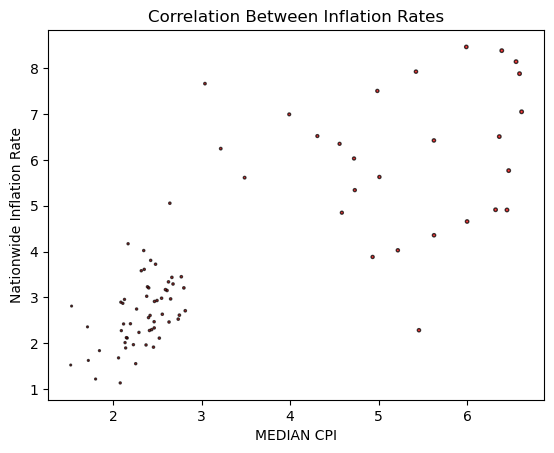

In [84]:
# plt.plot(filtered_df["DATE"],inflation_only['Nationwide Inflation Rate'], label='HUH?')
# plt.plot(filtered_df["DATE"],inflation_only['MEDIAN CPI'])
plt.scatter(inflation_only['Nationwide Inflation Rate'], inflation_only['MEDIAN CPI'], marker="o", facecolors="red", edgecolors="black",
            s=inflation_only['Nationwide Inflation Rate'], alpha=0.75)
plt.title("Correlation Between Inflation Rates")
plt.ylabel("Nationwide Inflation Rate")
plt.xlabel('MEDIAN CPI')
plt.savefig("Correlation_Graph.png")
plt.show()

In [85]:
corr_coeff, p_value = pearsonr(inflation_only['Nationwide Inflation Rate'], inflation_only['MEDIAN CPI'])
print(f"Pearson Correlation Coefficient: {corr_coeff}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.7919669249297556
P-value: 2.964406736942432e-19


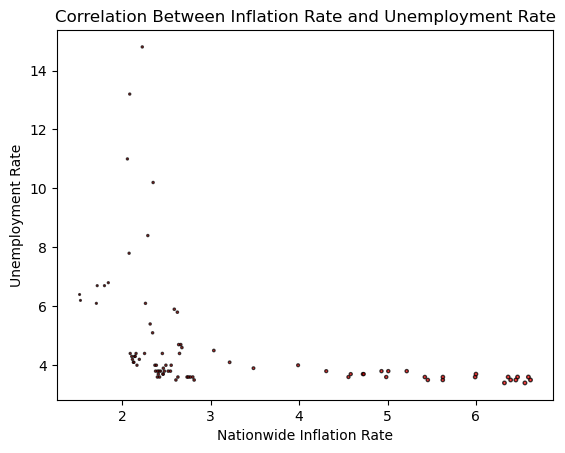

In [90]:
plt.scatter(inflation_only['Nationwide Inflation Rate'], filtered_df_ura['UNRATE'], marker="o", facecolors="red", edgecolors="black",
            s=inflation_only['Nationwide Inflation Rate'], alpha=0.75)
plt.title("Correlation Between Inflation Rate and Unemployment Rate")
plt.ylabel("Unemployment Rate")
plt.xlabel("Nationwide Inflation Rate")
plt.savefig("Correlation_Unemployment_inflation.png")
plt.show()

In [91]:
corr_coeff1, p_value1 = pearsonr(inflation_only['Nationwide Inflation Rate'], filtered_df_ura['UNRATE'])
print(f"Pearson Correlation Coefficient: {corr_coeff1}")
print(f"P-value: {p_value1}")

Pearson Correlation Coefficient: -0.38074052696715144
P-value: 0.0003531554559785261


In [93]:
merged_before = merged[(merged['DATE'] <= '2017-01-01')]
merged_before

,DATE,UNRATE,TXUR,CAUR,MIUR,NJUR,Nationwide Inflation Rate,Federal Funds Rate,MEDIAN CPI
0,1983-01-01,10.4,8.4,11.1,16.5,9.1,4.695598,11.20,5.014653
1,1983-02-01,10.4,8.5,11.0,16.3,9.0,4.627836,8.63,4.952545
2,1983-03-01,10.3,8.5,10.8,15.9,8.9,4.855813,8.65,3.612261
3,1983-04-01,10.2,8.5,10.5,15.5,8.7,4.456934,9.12,4.828054
4,1983-05-01,10.1,8.4,10.3,15.2,8.6,3.549624,8.84,3.767326
...,...,...,...,...,...,...,...,...,...
404,2016-09-01,5.0,4.8,5.5,5.1,4.9,2.632103,0.40,2.498329
405,2016-10-01,4.9,4.8,5.5,5.1,4.9,2.509518,0.29,2.018026
406,2016-11-01,4.7,4.8,5.4,5.1,4.8,2.525801,0.41,2.458832
407,2016-12-01,4.7,4.8,5.4,5.0,4.7,2.594944,0.41,2.038385


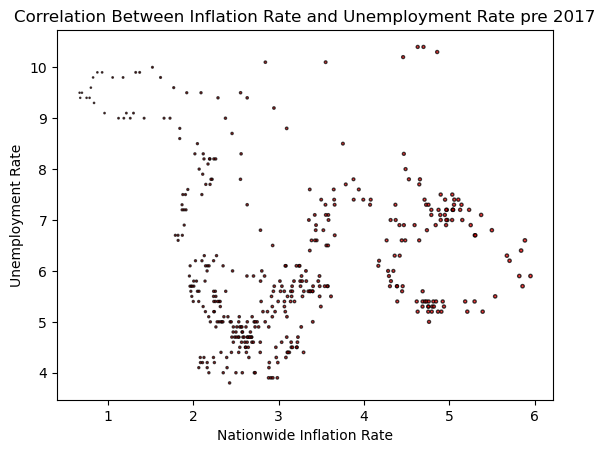

In [100]:
plt.scatter(merged_before['Nationwide Inflation Rate'], merged_before['UNRATE'], marker="o", facecolors="red", edgecolors="black",
            s=merged_before['Nationwide Inflation Rate'], alpha=0.75)
plt.title("Correlation Between Inflation Rate and Unemployment Rate pre 2017")
plt.ylabel("Unemployment Rate")
plt.xlabel("Nationwide Inflation Rate")
plt.savefig("Correlation_Unemployment_inflation_pre2017.png")
plt.show()

In [101]:
corr_coeff2, p_value2 = pearsonr(merged_before['Nationwide Inflation Rate'], merged_before['UNRATE'])
print(f"Pearson Correlation Coefficient: {corr_coeff2}")
print(f"P-value: {p_value2}")

Pearson Correlation Coefficient: -0.08013742653929433
P-value: 0.10559308557347408
